# **Import librares**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Suicide_Ideation_Dataset(Twitter-based).csv", engine='python', encoding='UTF-8')
df=df.replace('Potential Suicide post ','Potential Suicide post')
df['Suicide'].value_counts()
df

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post
...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post
1783,Starting my day out with a positive attitude! ...,Not Suicide post
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post
1785,2 drunken besties stumble into my room and we ...,Not Suicide post


## **Bert Model**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Suicide'], test_size=0.33, random_state=42)

In [6]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [7]:
class_names = ['Potential Suicide post', 'Not Suicide post']

In [8]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, class_names=class_names, preprocess_mode='bert', maxlen=140, max_features=5000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [9]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 140


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [10]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train), val_data=(x_val,y_val), batch_size=16)

In [11]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
75/75 [==============================] - 2450s 32s/step - loss: 0.4457 - accuracy: 0.7711 - val_loss: 0.1726 - val_accuracy: 0.9458
Epoch 2/3
75/75 [==============================] - 2352s 31s/step - loss: 0.1276 - accuracy: 0.9616 - val_loss: 0.1298 - val_accuracy: 0.9593
Epoch 3/3
75/75 [==============================] - 2434s 33s/step - loss: 0.0417 - accuracy: 0.9891 - val_loss: 0.1245 - val_accuracy: 0.9593


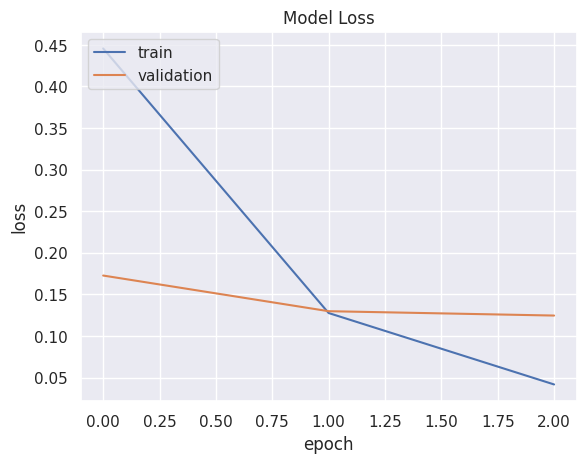

In [12]:
learner.plot()

In [13]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

19/19 [==============================] - 335s 17s/step
                        precision    recall  f1-score   support

Potential Suicide post       0.95      0.99      0.97       371
      Not Suicide post       0.98      0.91      0.94       219

              accuracy                           0.96       590
             macro avg       0.96      0.95      0.96       590
          weighted avg       0.96      0.96      0.96       590



array([[366,   5],
       [ 19, 200]])

In [14]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['Not Suicide post', 'Potential Suicide post']

In [15]:
message = 'i will  kill myself'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

predicted: Potential Suicide post


**Save Bert Model**

In [16]:
predictor.save("/content/drive/MyDrive/Colab Notebooks/NLP/Saved Models/Bert")

**Load Saved Model and Predict**

In [17]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab Notebooks/NLP/Saved Models/Bert')

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [20]:
data = "Aunanya wanna die, she doesn't wan to live in this world anymore."
predictor1.predict(data)

'Potential Suicide post'